In [22]:
%matplotlib inline

In [1]:
# much of the code for this challenge is in challenge.py
# moved to jupyter to do some of the categorical conversion and graphing

In [2]:
import pandas as pd

df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)

# copy data and separate predictors and response
X = df.copy()
y = X.pop('chd')

df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [3]:
# compute percentage of chronic heart disease for famhist
y.groupby(X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

In [4]:
import statsmodels.formula.api as smf

# encode df.famhist as a numeric via pd.Factor
df['famhist_ord'] = pd.Categorical(df.famhist).labels

est = smf.ols(formula="chd ~ famhist_ord", data=df).fit()

C:\Users\bob071988\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: 'labels' is deprecated. Use 'codes' instead


In [5]:
# ********** Ask Kyle about T.Present vs Absent - how to interpret

# a utility function to only show the coeff section of summary
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

# fit OLS on categorical variables children and occupation
est = smf.ols(formula='chd ~ C(famhist)', data=df).fit()
short_summary(est)

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,0.2370,0.028,8.489,0.000,0.182 0.292
C(famhist)[T.Present],0.2630,0.043,6.071,0.000,0.178 0.348


In [17]:

import numpy as np
# df = pd.read_csv('https://raw2.github.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/src/randhie.csv')
# df = pd.read_csv('https://raw.github.com/statsmodels/statsmodels/blob/master/statsmodels/datasets/randhie/randhie.csv', index_col=0)
df = pd.read_csv('https://raw.githubusercontent.com/statsmodels/statsmodels/master/statsmodels/datasets/randhie/randhie.csv')
df["logincome"] = np.log1p(df.income)
df[['mdvis', 'logincome', 'hlthp']].tail()

AttributeError: 'DataFrame' object has no attribute 'income'

In [18]:
df.head()

,mdvis,lncoins,idp,lpi,fmde,physlm,disea,hlthg,hlthf,hlthp
0,0,4.61512,1,6.907755,0,0,13.73189,1,0,0
1,2,4.61512,1,6.907755,0,0,13.73189,1,0,0
2,0,4.61512,1,6.907755,0,0,13.73189,1,0,0
3,0,4.61512,1,6.907755,0,0,13.73189,1,0,0
4,0,4.61512,1,6.907755,0,0,13.73189,1,0,0


In [19]:
from sklearn import datasets


In [20]:
# the rand dataset has moved and does not include income.

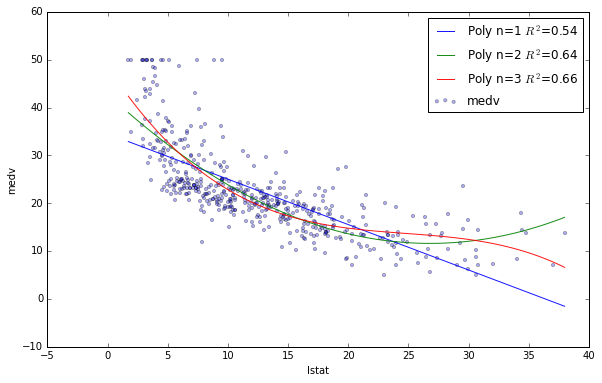

In [28]:
import matplotlib.pyplot as plt
# load the boston housing dataset - median house values in the Boston area
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df.lstat, df.medv, s=10, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearlyd space on lstats
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1-st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$=%.2f' % poly_1.rsquared, alpha=0.9)

# 2-nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3-rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$=%.2f' % poly_3.rsquared)

plt.legend()

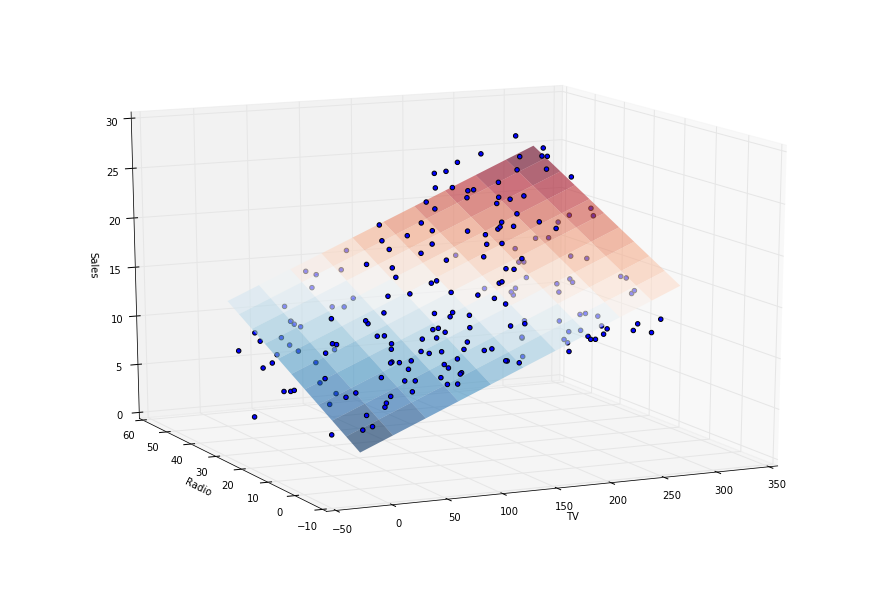

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']
df_adv.head()

# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')